In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_table("fruit.txt")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [9]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
numerical =  [i for i in df.columns if df[i].dtype != 'O']
categorical, numerical

(['fruit_name', 'fruit_subtype'],
 ['fruit_label', 'mass', 'width', 'height', 'color_score'])

In [10]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols = categorical)
df = encoder.fit_transform(df)

In [15]:
for i in numerical:
    print(df[i].unique())

[1 2 3 4]
[192 180 176  86  84  80  76 178 172 166 154 164 152 156 168 162 160 140
 170 342 356 362 204 158 210 190 142 150 144 194 200 186 216 196 174 132
 130 116 118 120]
[8.4 8.  7.4 6.2 6.  5.8 5.9 7.1 6.9 7.  7.3 7.6 7.7 7.5 9.  9.2 9.6 6.7
 7.8 7.2 6.8 6.1 6.3 6.5]
[ 7.3  6.8  7.2  4.7  4.6  4.3  4.   7.8  7.   7.6  7.1  7.7  7.5  7.4
  7.9  9.4  9.2  8.   8.1  8.2 10.3 10.5 10.2  9.7 10.1  8.7  8.4  8.5]
[0.55 0.59 0.6  0.8  0.79 0.77 0.81 0.92 0.89 0.93 0.88 0.7  0.69 0.67
 0.73 0.83 0.85 0.86 0.84 0.87 0.75 0.74 0.72 0.82 0.76 0.78 0.71]


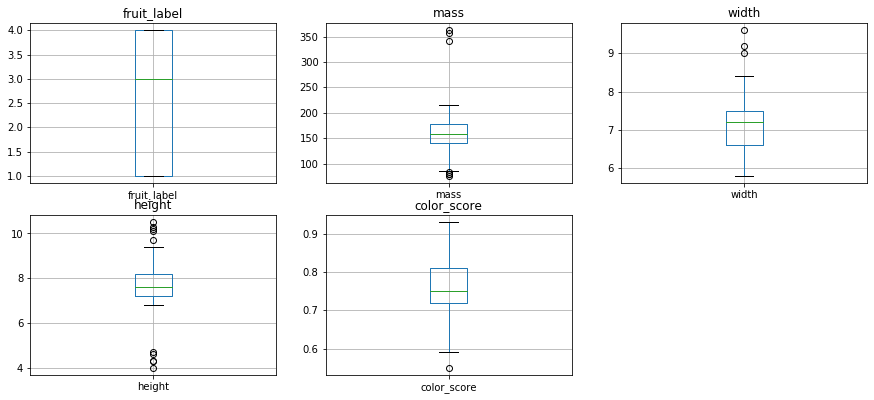

In [13]:
plt.figure(figsize = (15, 10))

for i in range(1, 6):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [numerical[i-1]])
    fig.set_title(numerical[i-1])


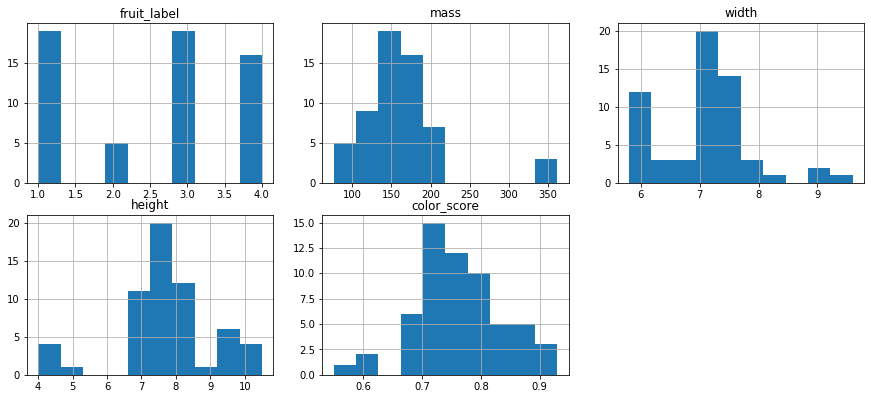

In [16]:
plt.figure(figsize = (15, 10))

for i in range(1, 6):
    plt.subplot(3,3,i)
    fig = df[numerical[i-1]].hist(bins = 10)
    fig.set_title(numerical[i-1])




In [17]:
for i in numerical:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    low = df[i].quantile(0.25) - (iqr * 1.5)
    high = df[i].quantile(0.75) + (iqr * 1.5)
    df[i] = np.where(df[i] > high, high, df[i])
    df[i] = np.where(df[i] < low, low, df[i])

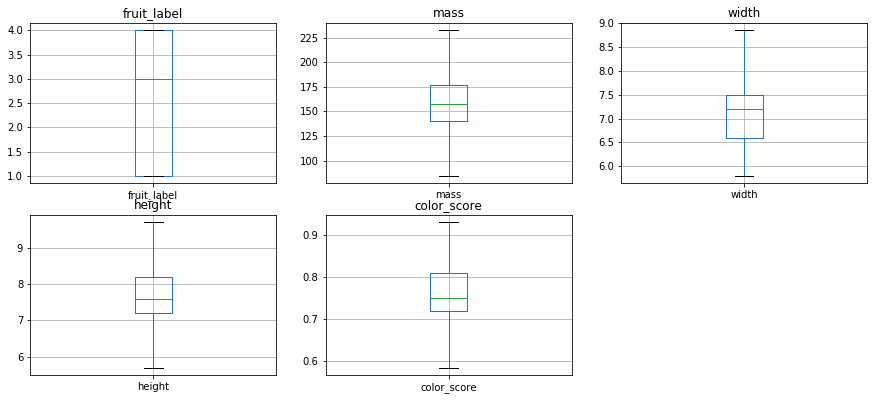

In [18]:
plt.figure(figsize = (15, 10))

for i in range(1, 6):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [numerical[i-1]])
    fig.set_title(numerical[i-1])


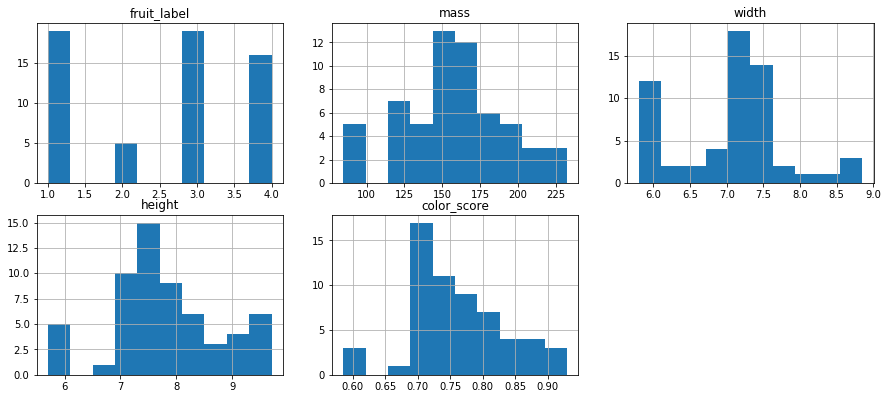

In [19]:
plt.figure(figsize = (15, 10))

for i in range(1, 6):
    plt.subplot(3,3,i)
    fig = df[numerical[i-1]].hist(bins = 10)
    fig.set_title(numerical[i-1])




In [35]:
x = df.drop("fruit_label", axis = 1)
y = df["fruit_label"]

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [62]:
y_pred = knn.predict(xtest)

y_pred

array([4., 1., 3., 4., 3., 3., 3., 1., 1., 4., 4., 2., 3., 3., 3.])

In [63]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

Model accuracy score: 1.0000


In [49]:
neighbors = np.arange(1, 20)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    
    train_acc[i] = knn.score(xtrain, ytrain)
    test_acc[i] = knn.score(xtest, ytest)
    
train_acc    

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.97727273,
       0.97727273, 0.95454545, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.90909091])

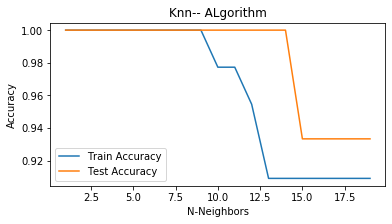

In [50]:
plt.figure(figsize=(6, 3))
plt.title("Knn-- ALgorithm")

plt.plot(neighbors, train_acc, label = "Train Accuracy")
plt.plot(neighbors, test_acc, label = "Test Accuracy")

plt.xlabel("N-Neighbors")
plt.ylabel("Accuracy")

plt.legend()

In [54]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {"n_neighbors": np.arange(1, 48)}

In [58]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv= 5)
grid.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
round(grid.best_score_, 4)

0.6621

In [60]:
grid.best_params_

{'n_neighbors': 1}

In [67]:
allscores=grid.cv_results_['mean_test_score']
print(allscores)

[0.66212121 0.64242424 0.59242424 0.64242424 0.57575758 0.64242424
 0.64242424 0.62424242 0.55909091 0.52878788 0.52727273 0.49090909
 0.50757576 0.50757576 0.50757576 0.49090909 0.47424242 0.45757576
 0.40757576 0.39090909 0.35606061 0.31969697 0.33636364 0.33636364
 0.33787879 0.32121212 0.32121212 0.32121212 0.32121212 0.32121212
 0.32121212 0.32121212 0.35454545 0.32121212 0.32121212 0.33787879
 0.32121212 0.32121212 0.32121212 0.32121212 0.32121212 0.32121212
 0.27121212 0.27121212 0.27121212 0.27121212 0.30454545]
